In [1]:
import pandas as pd
from collections import Counter
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# read in the data and convert to json
df_art = pd.read_csv('clean_articles.csv')
df_art.word_counts = df_art.word_counts.apply(lambda x: x[8:-1].replace("'", "\""))
df_art.word_counts = df_art.word_counts.apply(json.loads)
df_art.head()

,title,subreddit,word_counts
0,Meta's threat to close down Facebook and Insta...,nottheonion,"{'data': 14, 'transfer': 7, 'european': 6, 'wi..."
1,Pregnant Texas woman driving in HOV lane told ...,nottheonion,"{'said': 7, 'officer': 6, 'according': 5, 'cit..."
2,Mark Zuckerberg Says Meta Employees “Lovingly”...,nottheonion,"{'given': 2, 'employee': 2, 'energy': 2, 'news..."
3,Police didn't immediately confront the gunman ...,nottheonion,"{'school': 5, 'shooting': 5, 'gunman': 5, 'off..."
4,Shaquille O'Neal says gorillas freak out when ...,nottheonion,"{'gorilla': 9, 'zoo': 5, 'look': 5, 'story': 4..."


In [2]:
def get_total_counts(df, subreddit):
    """ Get the total counts for a given subreddit """
    total_count = Counter()
    for d in df.query(f'subreddit == "{subreddit}"').word_counts:
        total_count = total_count + Counter(d)
    return total_count

# get the total counts for each subreddit
counts = {
'nottheonion': get_total_counts(df_art, 'nottheonion'),
'TheOnion': get_total_counts(df_art, 'TheOnion')
}

In [3]:
type(counts['TheOnion'])

collections.Counter

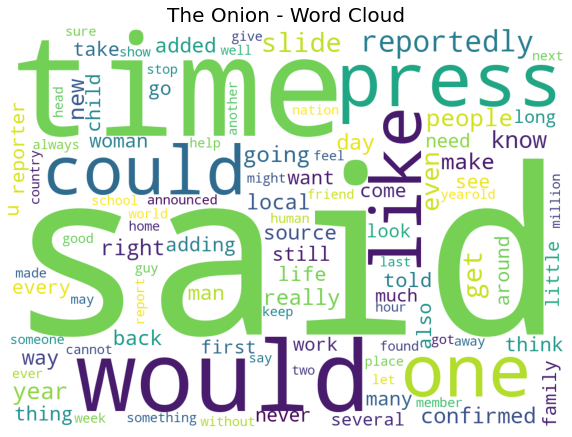

In [4]:
# create word cloud for The Onion articles using counter data
wc_onion = WordCloud(max_words=100,
           max_font_size=500, 
           font_step=2, 
           background_color='white', 
           width=1000,
           height=720).generate_from_frequencies(counts['TheOnion'])

# format word cloud
plt.figure(figsize=(10,8))
plt.imshow(wc_onion)
plt.axis('off')
plt.title('The Onion - Word Cloud', fontsize=20)

# save as an image
plt.savefig('cloud-onion.png', bbox_inches='tight')

# display word cloud
plt.show()

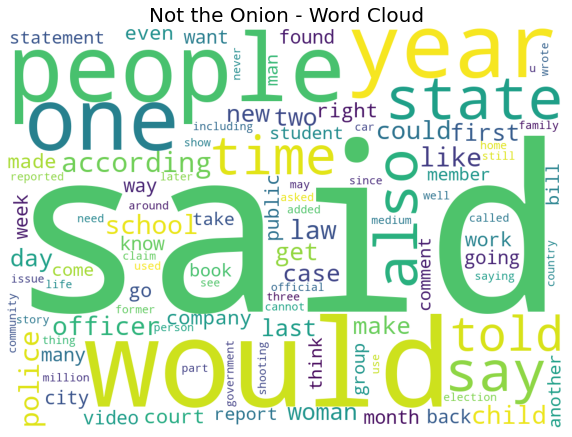

In [5]:
# create word cloud for Not the Onion articles using counter data
wc_onion = WordCloud(max_words=100,
           max_font_size=500, 
           font_step=2, 
           background_color='white', 
           width=1000,
           height=720).generate_from_frequencies(counts['nottheonion'])

# format word cloud
plt.figure(figsize=(10,8))
plt.imshow(wc_onion)
plt.axis('off')
plt.title('Not the Onion - Word Cloud', fontsize=20)

# save as an image
plt.savefig('cloud-notonion.png', bbox_inches='tight')

# display word cloud
plt.show()